In [4]:
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as st

## Hypotesisi Testing
### Live demo

In [3]:
heights = pd.read_table("heights.csv")

In [14]:
# heights.shape
print(heights.mean())
print(heights.std()) # standard deviation

Height    159.774929
dtype: float64
Height    6.02974
dtype: float64


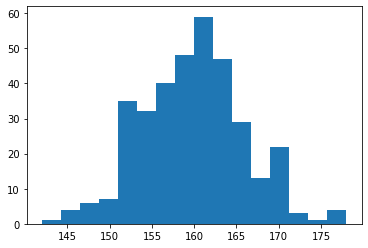

In [11]:
plt.hist(heights["Height"], bins = "fd")
plt.show()

In [13]:
heights["Height"].skew()

0.12949157365903907

In [15]:
heights[heights["Height"] >= 170].count()

Height    22
dtype: int64

In [20]:
# 50% - percent point function
mean_height = heights.mean()
std = heights.std()
height_model = st.norm(loc = mean_height, scale = std)

standard_gausian_distribution = st.norm(loc = 0, scale = 1)

In [19]:
height_model.ppf(0.5) # this is the value of which 50% are smaller

array([159.77492877])

In [24]:
standard_gausian_distribution.ppf(0.97)

1.8807936081512509

In [25]:
height_model.ppf(0.975) # this is the value of which 97.5% are smaller

array([171.59300285])

In [28]:
print(heights[heights["Height"] >= 171.6].count())
print( 1 - height_model.cdf(171.6)) # comulative density function

Height    8
dtype: int64
[0.02493226]


In [45]:
def get_real_confidence_interval(percentage, mean, std):
    model = st.norm(loc = mean, scale = std)
    lower_bound = (1 - percentage) / 2
    upper_bound = (1 + percentage) / 2
    
    return model.ppf(lower_bound)[0], model.ppf(upper_bound)[0]

In [46]:
print(get_real_confidence_interval(0.95, mean_height, std))

(147.95685469850773, 171.59300285134984)


In [50]:
low_height, hi_height = get_real_confidence_interval(0.95, mean_height, std) 
# 95% of women have height in following interval 

In [48]:
print(low_height, hi_height)

147.95685469850773 171.59300285134984


In [51]:
heights[(heights["Height"] >= low_height) & (heights["Height"] <= hi_height)]

,Height
0,156
1,163
2,169
3,161
4,154
...,...
346,159
347,170
348,160
349,152


In [52]:
heights[(heights["Height"] >= low_height) & (heights["Height"] <= hi_height)].count()/len(heights)

Height    0.951567
dtype: float64

## T testing


In [36]:
sample_data = st.norm.rvs(loc = 5,scale = 10, size = 10000) # normal distribution RandomValues
sample_data

array([11.45832603, 14.2869679 , 11.26681204, ..., -2.98586885,
       14.2775786 , -9.6722991 ])

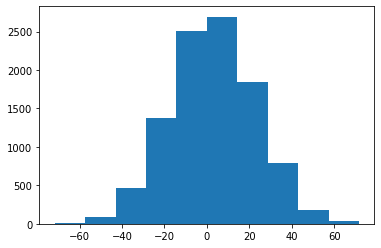

In [35]:
plt.hist(sample_data, bins = 10)
plt.show()

In [26]:
print(sample_data.mean())
print(sample_data.std())

5.0869128083968915
9.914447792451329


In [27]:
st.ttest_1samp(sample_data, 5)

Ttest_1sampResult(statistic=0.8765839960748564, pvalue=0.3807336936726021)

### grain size per year

In [38]:
grain_data = pd.read_table("grain_data.csv")
grain_data

,Year,GreatNorthern,BigFour
0,1912,71.0,54.7
1,1913,73.9,60.6
2,1914,48.9,45.1
3,1915,78.9,71.0
4,1916,43.5,40.9
5,1917,47.9,45.4
6,1918,63.0,53.4
7,1919,48.4,41.2
8,1920,48.1,44.8


In [39]:
# compare two fifferent distributions, initially do not take into account the year. Pvalue is 20% hace there may be difference
st.ttest_ind(grain_data["GreatNorthern"], grain_data["BigFour"]) #independent

Ttest_indResult(statistic=1.312336706487564, pvalue=0.20792200785311768)

In [41]:
# compare year by year, the probability both fileds are NOT connected is 0.2% (pval)
st.ttest_rel(grain_data["GreatNorthern"], grain_data["BigFour"]) #related

Ttest_relResult(statistic=4.478698413876239, pvalue=0.002059344152078817)

## Zink in a given lake. Each sample is per lake

In [42]:
water_data = pd.read_table("water_data.csv")
water_data

,bottom,surface
0,0.430,0.415
1,0.266,0.238
2,0.567,0.390
3,0.531,0.410
4,0.707,0.605
5,0.716,0.609
6,0.651,0.632
7,0.589,0.523
8,0.469,0.411
9,0.723,0.612


In [44]:
st.ttest_rel(water_data["bottom"], water_data["surface"]) # big dif between mean values

Ttest_relResult(statistic=4.863812745135179, pvalue=0.0008911154578225548)

In [45]:
water_data["bottom"].mean(), water_data["surface"].mean()

(0.5649000000000001, 0.48450000000000004)